Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [163]:
#statistical test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
#evaluation matrix
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

Importing Dataset

In [4]:
data=pd.read_csv(r"C:\Users\FELICITA\Documents\imarticus\python\downloads\data\laptopPrice.csv")

In [5]:
data.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


1. brand-Company
2. processor_brand-Processor's brand
3. processor_name-Name of the Processor
4. processor_gnrtn-Processor Generation
5. ram_gb-Ram size
6. ram_type-Ram Type
7. ssd-SSD Size
8. hdd-HDD Size
9. os-OS type
10. os_bit-OS bits
11. graphic_card_gb-graphic card size
12. weight-Weight of the laptop
13. warranty-warranty of the laptop
14. Touchscreen-weather the laptop is touch or not
15. msoffice-wheather the laptop has msoffice
16. Price-price of the laptop
17. rating-rating of the laptop
18. Number of Ratings-number of ratings for the laptop
19. Number of Reviews-number of reviews for the laptop

Exploring dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
brand                823 non-null object
processor_brand      823 non-null object
processor_name       823 non-null object
processor_gnrtn      823 non-null object
ram_gb               823 non-null object
ram_type             823 non-null object
ssd                  823 non-null object
hdd                  823 non-null object
os                   823 non-null object
os_bit               823 non-null object
graphic_card_gb      823 non-null object
weight               823 non-null object
warranty             823 non-null object
Touchscreen          823 non-null object
msoffice             823 non-null object
Price                823 non-null int64
rating               823 non-null object
Number of Ratings    823 non-null int64
Number of Reviews    823 non-null int64
dtypes: int64(3), object(16)
memory usage: 122.2+ KB


In [7]:
data.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


In [8]:
data.shape

(823, 19)

Exploratory data analysis

In [9]:
data.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [10]:
data[data.duplicated()]

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
13,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,22990,3 stars,0,0
45,ASUS,Intel,Core i3,11th,8 GB,DDR4,256 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,45990,4 stars,816,147
125,ASUS,Intel,Core i3,10th,4 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,40990,4 stars,4008,519
182,DELL,Intel,Core i3,11th,4 GB,DDR4,256 GB,1024 GB,Windows,64-bit,0 GB,ThinNlight,1 year,No,Yes,43590,3 stars,0,0
265,ASUS,Intel,Core i5,11th,16 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,59990,3 stars,0,0
352,ASUS,Intel,Core i5,11th,8 GB,LPDDR4X,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,84990,3 stars,0,0
375,ASUS,Intel,Core i5,11th,8 GB,LPDDR4X,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,Yes,No,99990,3 stars,0,0
391,Avita,Intel,Core i5,7th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,65556,3 stars,0,0
393,Avita,Intel,Core i5,7th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,65556,3 stars,0,0
399,Avita,Intel,Core i5,8th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,73063,3 stars,17,3


In [11]:
data.drop_duplicates(keep='first',inplace=True)

In [12]:
data.shape

(802, 19)

In [13]:
data

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
5,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,22990,3 stars,0,0
6,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,21990,3 stars,31,3
7,ASUS,Intel,Core i5,10th,8 GB,DDR4,0 GB,1024 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,58799,3 stars,0,0
8,Lenovo,Intel,Core i5,10th,4 GB,DDR4,0 GB,1024 GB,Windows,32-bit,0 GB,Casual,No warranty,No,No,49999,3 stars,0,0
9,acer,AMD,Ryzen 5,10th,4 GB,DDR4,0 GB,512 GB,Windows,32-bit,4 GB,Casual,No warranty,No,No,59990,4 stars,1946,240


In [14]:
# Statistical test

# t-test
from scipy.stats import ttest_ind
# Anova test
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# chi-square
from scipy.stats import (chi2,chi2_contingency)

import statsmodels.formula.api as smf

Exploring Each Column

In [15]:
data.Price.head()

0    34649
1    38999
2    39999
3    69990
4    26990
Name: Price, dtype: int64

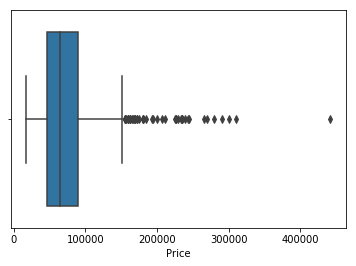

In [16]:
sns.boxplot(data.Price)

In [17]:
data[data.Price>250000].index

Int64Index([433, 547, 590, 591, 593, 594, 621], dtype='int64')

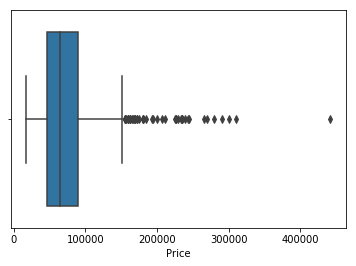

In [18]:
sns.boxplot(data.Price)

In [19]:
data.drop(data[data.Price>250000].index,axis=0,inplace=True)

In [20]:
data[data.Price>250000].index

Int64Index([], dtype='int64')

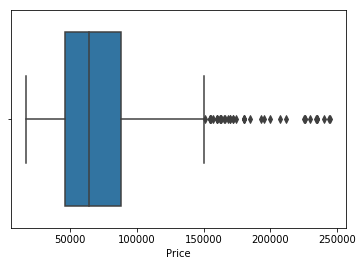

In [21]:
sns.boxplot(data.Price)

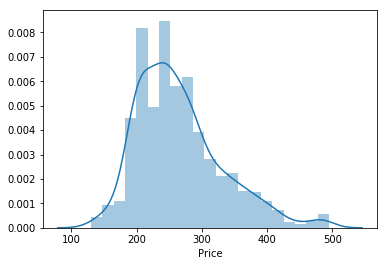

In [22]:
sns.distplot(np.sqrt(data.Price))

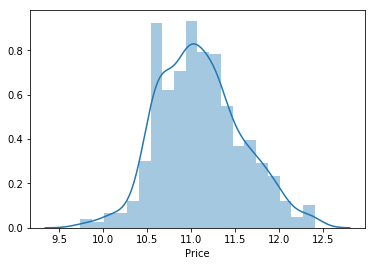

In [23]:
sns.distplot(np.log(data.Price))

In [24]:
data.price=np.log(data.Price)

In [25]:
data.Price.head()

0    34649
1    38999
2    39999
3    69990
4    26990
Name: Price, dtype: int64

Brand(catagorical Data)

In [26]:
data.brand.dtype

dtype('O')

In [27]:
data.brand.unique()

array(['ASUS', 'Lenovo', 'acer', 'Avita', 'HP', 'DELL', 'MSI', 'APPLE'],
      dtype=object)

In [28]:
data.brand.describe()

count      795
unique       8
top       ASUS
freq       240
Name: brand, dtype: object

In [29]:
data.brand.value_counts()

ASUS      240
DELL      149
Lenovo    143
HP        136
acer       51
MSI        48
APPLE      22
Avita       6
Name: brand, dtype: int64

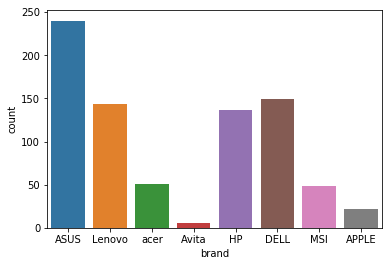

In [30]:
sns.countplot(data.brand)

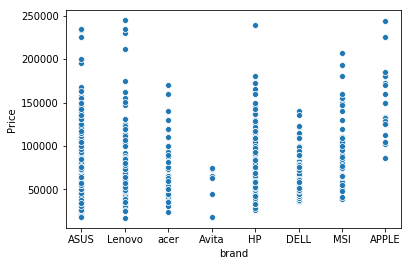

In [31]:
sns.scatterplot(x="brand",y="Price",data=data)

In [32]:
model_brand=ols("Price ~ brand",data=data).fit()
anova_brand=sm.stats.anova_lm(model_brand)
anova_brand

,df,sum_sq,mean_sq,F,PR(>F)
brand,7.0,1.710194e+11,2.443134e+10,18.03628,2.586611e-22
Residual,787.0,1.066044e+12,1.354567e+09,NaN,NaN


In [33]:
data.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [34]:
data.processor_brand.dtype

dtype('O')

In [35]:
data.processor_brand.unique()

array(['Intel', 'AMD', 'M1'], dtype=object)

In [36]:
data.processor_brand.describe()

count       795
unique        3
top       Intel
freq        588
Name: processor_brand, dtype: object

In [37]:
data.processor_brand.value_counts()

Intel    588
AMD      189
M1        18
Name: processor_brand, dtype: int64

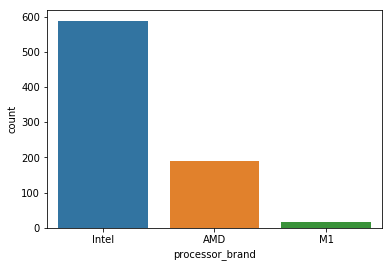

In [38]:
sns.countplot(data.processor_brand)

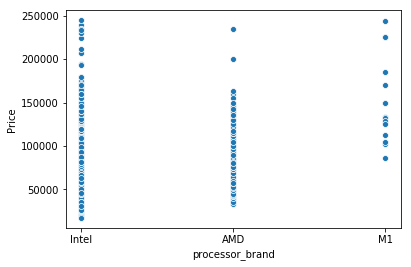

In [39]:
sns.scatterplot(x="processor_brand",y="Price",data=data)

In [40]:
model_processor_brand=ols("Price ~ processor_brand",data=data).fit()
anova_processor_brand=sm.stats.anova_lm(model_processor_brand)
anova_processor_brand

,df,sum_sq,mean_sq,F,PR(>F)
processor_brand,2.0,9.478639e+10,4.739319e+10,32.860166,1.951070e-14
Residual,792.0,1.142277e+12,1.442269e+09,NaN,NaN


In [41]:
data.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [42]:
data.processor_name.dtype

dtype('O')

In [43]:
data.processor_name.unique()

array(['Core i3', 'Core i5', 'Celeron Dual', 'Ryzen 5', 'Core i7',
       'Core i9', 'M1', 'Pentium Quad', 'Ryzen 3', 'Ryzen 7', 'Ryzen 9'],
      dtype=object)

In [44]:
data.processor_name.describe()

count         795
unique         11
top       Core i5
freq          283
Name: processor_name, dtype: object

In [45]:
data.processor_name.value_counts()

Core i5         283
Core i3         161
Core i7         103
Ryzen 5          82
Ryzen 7          56
Ryzen 9          26
Ryzen 3          26
Celeron Dual     23
M1               18
Pentium Quad     13
Core i9           4
Name: processor_name, dtype: int64

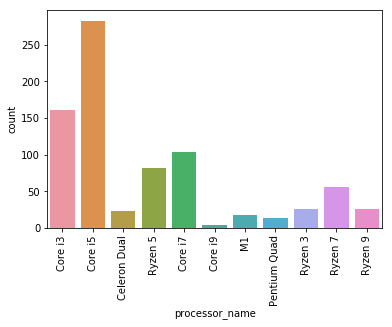

In [46]:
sns.countplot(data.processor_name)
plt.xticks(rotation=90)
plt.show()

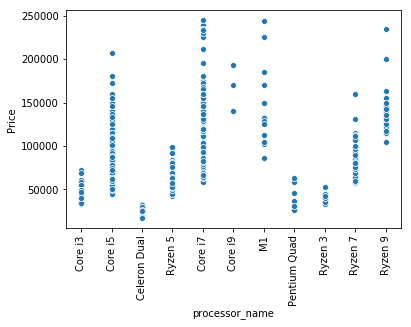

In [47]:
sns.scatterplot(x="processor_name",y="Price",data=data)
plt.xticks(rotation=90)
plt.show()

In [48]:
model_processor_name=ols("Price ~ processor_name",data=data).fit()
anova_processor_name=sm.stats.anova_lm(model_processor_name)
anova_processor_name

,df,sum_sq,mean_sq,F,PR(>F)
processor_name,10.0,7.476574e+11,7.476574e+10,119.770398,1.839946e-150
Residual,784.0,4.894059e+11,6.242423e+08,NaN,NaN


In [49]:
data.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [50]:
data.processor_gnrtn.dtype

dtype('O')

In [51]:
data.processor_gnrtn.unique()

array(['10th', 'Not Available', '11th', '7th', '8th', '9th', '4th',
       '12th'], dtype=object)

In [52]:
data.processor_gnrtn.describe()

count      795
unique       8
top       11th
freq       327
Name: processor_gnrtn, dtype: object

In [53]:
data.processor_gnrtn.value_counts()

11th             327
Not Available    224
10th             194
8th               35
7th                7
9th                6
12th               1
4th                1
Name: processor_gnrtn, dtype: int64

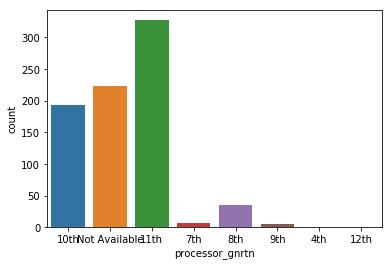

In [54]:
sns.countplot(data.processor_gnrtn)

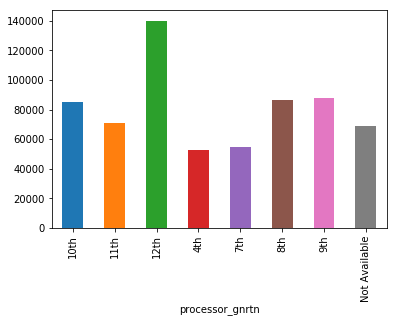

In [55]:
data.groupby("processor_gnrtn")["Price"].mean().plot(kind="bar")

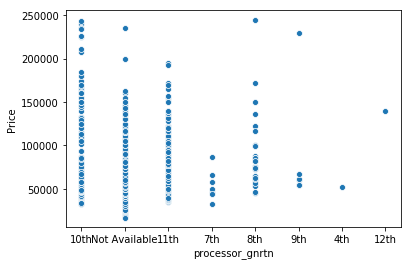

In [56]:
sns.scatterplot(x="processor_gnrtn",y="Price",data=data)

In [57]:
model_processor_gnrtn=ols("Price ~ processor_gnrtn",data=data).fit()
anova_processor_gnrtn=sm.stats.anova_lm(model_processor_gnrtn)
anova_processor_gnrtn

,df,sum_sq,mean_sq,F,PR(>F)
processor_gnrtn,7.0,4.510572e+10,6.443674e+09,4.254489,0.000126
Residual,787.0,1.191958e+12,1.514559e+09,NaN,NaN


In [58]:
data.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [59]:
data.ram_gb.dtype

dtype('O')

In [60]:
data.ram_gb.unique()

array(['4 GB', '8 GB', '16 GB', '32 GB'], dtype=object)

In [61]:
data.ram_gb.describe()

count      795
unique       4
top       8 GB
freq       403
Name: ram_gb, dtype: object

In [62]:
data.ram_gb.value_counts()

8 GB     403
4 GB     223
16 GB    168
32 GB      1
Name: ram_gb, dtype: int64

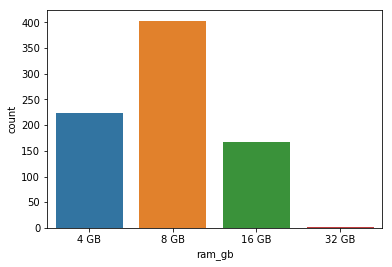

In [63]:
sns.countplot(data.ram_gb)

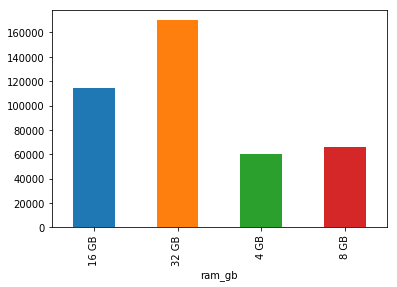

In [64]:
data.groupby("ram_gb")["Price"].mean().plot(kind="bar")

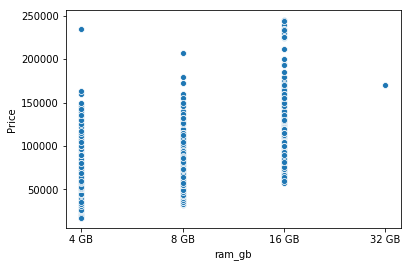

In [65]:
sns.scatterplot(x="ram_gb",y="Price",data=data)

In [66]:
model_ram_gb=ols("Price ~ ram_gb",data=data).fit()
anova_ram_gb=sm.stats.anova_lm(model_ram_gb)
anova_ram_gb

,df,sum_sq,mean_sq,F,PR(>F)
ram_gb,3.0,3.485288e+11,1.161763e+11,103.423563,1.727599e-56
Residual,791.0,8.885346e+11,1.123305e+09,NaN,NaN


In [67]:
data.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [68]:
data.ram_type.dtype

dtype('O')

In [69]:
data.ram_type.unique()

array(['DDR4', 'LPDDR4', 'LPDDR4X', 'DDR5', 'DDR3', 'LPDDR3'],
      dtype=object)

In [70]:
data.ram_type.describe()

count      795
unique       6
top       DDR4
freq       686
Name: ram_type, dtype: object

In [71]:
data.ram_type.value_counts()

DDR4       686
LPDDR4X     56
LPDDR4      26
LPDDR3      14
DDR3         7
DDR5         6
Name: ram_type, dtype: int64

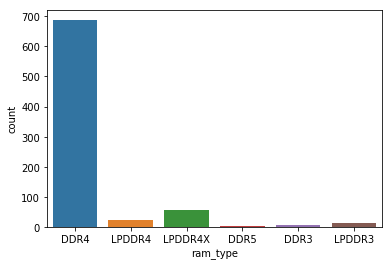

In [72]:
sns.countplot(data.ram_type)

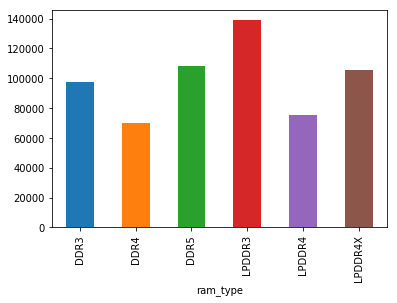

In [73]:
data.groupby("ram_type")["Price"].mean().plot(kind="bar")

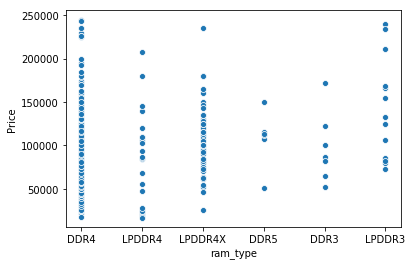

In [74]:
sns.scatterplot(x="ram_type",y="Price",data=data)

In [75]:
model_ram_type=ols("Price ~ ram_type",data=data).fit()
anova_ram_type=sm.stats.anova_lm(model_ram_type)
anova_ram_type

,df,sum_sq,mean_sq,F,PR(>F)
ram_type,5.0,1.355507e+11,2.711013e+10,19.418656,2.894756e-18
Residual,789.0,1.101513e+12,1.396087e+09,NaN,NaN


In [76]:
data.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [77]:
data.ssd.dtype

dtype('O')

In [78]:
data.ssd.unique()

array(['0 GB', '512 GB', '256 GB', '128 GB', '1024 GB', '2048 GB'],
      dtype=object)

In [79]:
data.ssd.describe()

count        795
unique         6
top       512 GB
freq         389
Name: ssd, dtype: object

In [80]:
data.ssd.value_counts()

512 GB     389
256 GB     174
0 GB       122
1024 GB    105
128 GB       3
2048 GB      2
Name: ssd, dtype: int64

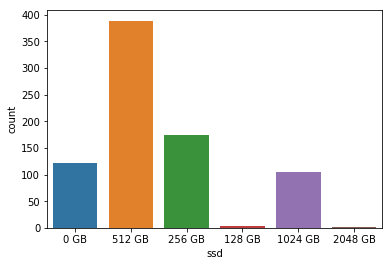

In [81]:
sns.countplot(data.ssd)

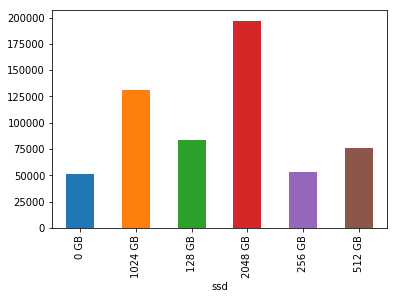

In [82]:
data.groupby("ssd")["Price"].mean().plot(kind="bar")

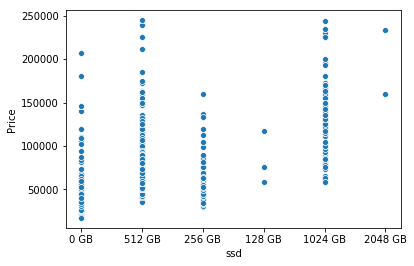

In [83]:
sns.scatterplot(x="ssd",y="Price",data=data)

In [84]:
model_ssd=ols("Price ~ ssd",data=data).fit()
anova_ssd=sm.stats.anova_lm(model_ssd)
anova_ssd

,df,sum_sq,mean_sq,F,PR(>F)
ssd,5.0,5.095635e+11,1.019127e+11,110.528036,1.743843e-88
Residual,789.0,7.274998e+11,9.220530e+08,NaN,NaN


In [85]:
data.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [86]:
data.hdd.dtype

dtype('O')

In [87]:
data.hdd.unique()

array(['1024 GB', '0 GB', '512 GB', '2048 GB'], dtype=object)

In [88]:
data.hdd.describe()

count      795
unique       4
top       0 GB
freq       596
Name: hdd, dtype: object

In [89]:
data.hdd.value_counts()

0 GB       596
1024 GB    159
512 GB      39
2048 GB      1
Name: hdd, dtype: int64

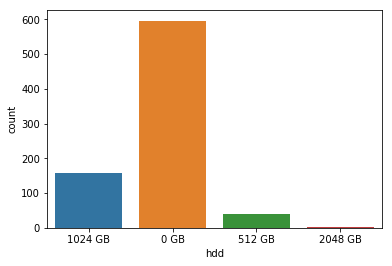

In [90]:
sns.countplot(data.hdd)

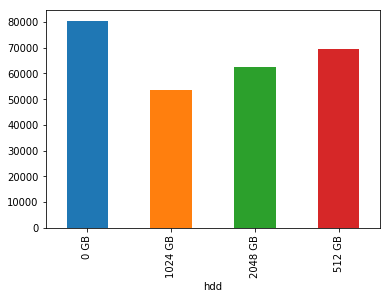

In [91]:
data.groupby("hdd")["Price"].mean().plot(kind="bar")

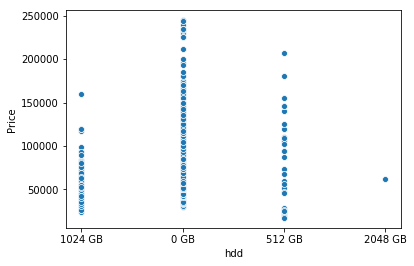

In [92]:
sns.scatterplot(x="hdd",y="Price",data=data)

In [93]:
model_hdd=ols("Price ~ hdd",data=data).fit()
anova_hdd=sm.stats.anova_lm(model_hdd)
anova_hdd

,df,sum_sq,mean_sq,F,PR(>F)
hdd,3.0,9.102550e+10,3.034183e+10,20.942056,4.610424e-13
Residual,791.0,1.146038e+12,1.448847e+09,NaN,NaN


In [94]:
data.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [95]:
data.os.dtype

dtype('O')

In [96]:
data.os.unique()

array(['Windows', 'DOS', 'Mac'], dtype=object)

In [97]:
data.os.describe()

count         795
unique          3
top       Windows
freq          758
Name: os, dtype: object

In [98]:
data.os.value_counts()

Windows    758
Mac         22
DOS         15
Name: os, dtype: int64

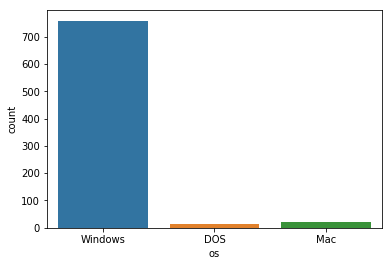

In [99]:
sns.countplot(data.os)

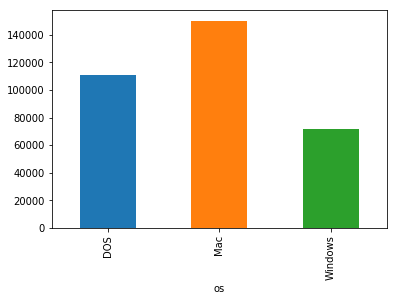

In [100]:
data.groupby("os")["Price"].mean().plot(kind="bar")

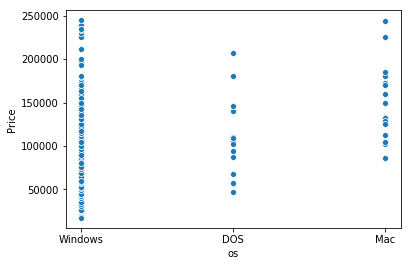

In [101]:
sns.scatterplot(x="os",y="Price",data=data)

In [102]:
model_os=ols("Price ~ os",data=data).fit()
anova_os=sm.stats.anova_lm(model_os)
anova_os

,df,sum_sq,mean_sq,F,PR(>F)
os,2.0,1.513213e+11,7.566064e+10,55.191034,3.635392e-23
Residual,792.0,1.085742e+12,1.370886e+09,NaN,NaN


In [103]:
data.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [104]:
data.os_bit.dtype

dtype('O')

In [105]:
data.os_bit.unique()

array(['64-bit', '32-bit'], dtype=object)

In [106]:
data.os_bit.describe()

count        795
unique         2
top       64-bit
freq         689
Name: os_bit, dtype: object

In [107]:
data.os_bit.value_counts()

64-bit    689
32-bit    106
Name: os_bit, dtype: int64

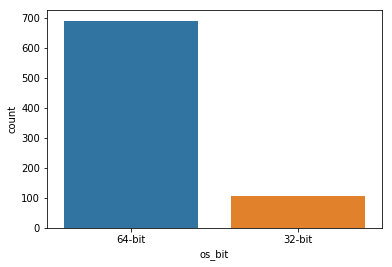

In [108]:
sns.countplot(data.os_bit)

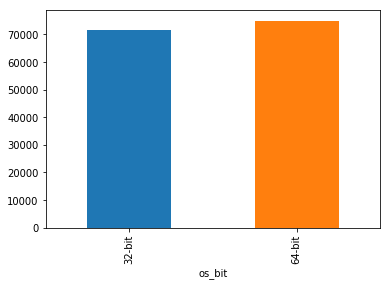

In [109]:
data.groupby("os_bit")["Price"].mean().plot(kind="bar")

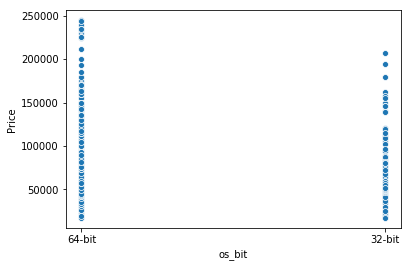

In [110]:
sns.scatterplot(x="os_bit",y="Price",data=data)

In [111]:
model_os_bit=ols("Price ~ os_bit",data=data).fit()
anova_os_bit=sm.stats.anova_lm(model_os_bit)
anova_os_bit

,df,sum_sq,mean_sq,F,PR(>F)
os_bit,1.0,1.031231e+09,1.031231e+09,0.661606,0.416238
Residual,793.0,1.236032e+12,1.558679e+09,NaN,NaN


In [112]:
data.drop("os_bit",axis=1,inplace=True)

In [113]:
data.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'graphic_card_gb', 'weight',
       'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

Data Type
 object
Unique Datas
 ['0 GB' '2 GB' '4 GB' '6 GB' '8 GB']
Describing the data
 count      795
unique       5
top       0 GB
freq       556
Name: graphic_card_gb, dtype: object
Count of each unique datas
 0 GB    556
4 GB    127
2 GB     67
6 GB     33
8 GB     12
Name: graphic_card_gb, dtype: int64


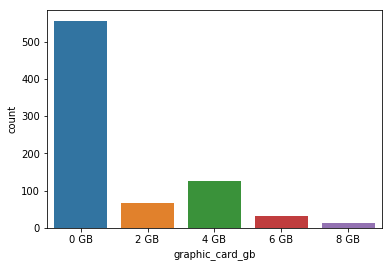

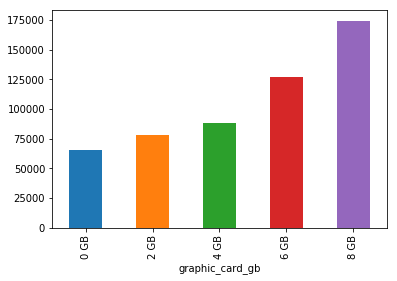

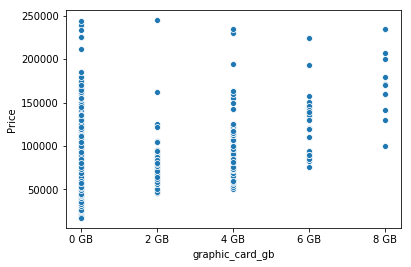

Anova test
                     df        sum_sq       mean_sq          F        PR(>F)
graphic_card_gb    4.0  2.772890e+11  6.932225e+10  57.059848  2.594227e-42
Residual         790.0  9.597743e+11  1.214904e+09        NaN           NaN


In [114]:
print("Data Type\n",data.graphic_card_gb.dtype)
print("Unique Datas\n",data.graphic_card_gb.unique())
print("Describing the data\n",data.graphic_card_gb.describe())
print("Count of each unique datas\n",data.graphic_card_gb.value_counts())

sns.countplot(data.graphic_card_gb)
plt.show()
data.groupby("graphic_card_gb")["Price"].mean().plot(kind="bar")
plt.show()
sns.scatterplot(x="graphic_card_gb",y="Price",data=data)
plt.show()

model_graphic_card_gb=ols("Price ~ graphic_card_gb",data=data).fit()
anova_graphic_card_gb=sm.stats.anova_lm(model_graphic_card_gb)
print("Anova test\n",anova_graphic_card_gb)

In [115]:
data.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'graphic_card_gb', 'weight',
       'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

Data Type
 object
Unique Datas
 ['Casual' 'ThinNlight' 'Gaming']
Describing the data
 count        795
unique         3
top       Casual
freq         502
Name: weight, dtype: object
Count of each unique datas
 Casual        502
ThinNlight    254
Gaming         39
Name: weight, dtype: int64


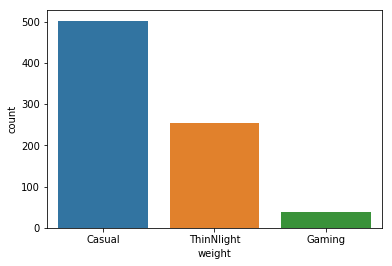

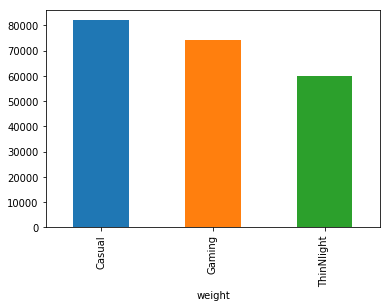

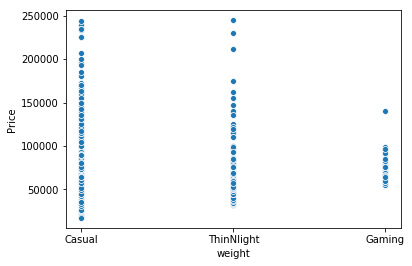

Anova test
              df        sum_sq       mean_sq          F        PR(>F)
weight      2.0  8.238547e+10  4.119273e+10  28.254325  1.403742e-12
Residual  792.0  1.154678e+12  1.457927e+09        NaN           NaN


In [116]:
print("Data Type\n",data.weight.dtype)
print("Unique Datas\n",data.weight.unique())
print("Describing the data\n",data.weight.describe())
print("Count of each unique datas\n",data.weight.value_counts())

sns.countplot(data.weight)
plt.show()
data.groupby("weight")["Price"].mean().plot(kind="bar")
plt.show()
sns.scatterplot(x="weight",y="Price",data=data)
plt.show()

model_weight=ols("Price ~ weight",data=data).fit()
anova_weight=sm.stats.anova_lm(model_weight)
print("Anova test\n",anova_weight)

In [117]:
data.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'graphic_card_gb', 'weight',
       'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

Data Type
 object
Unique Datas
 ['No warranty' '1 year' '2 years' '3 years']
Describing the data
 count        795
unique         4
top       1 year
freq         495
Name: warranty, dtype: object
Count of each unique datas
 1 year         495
No warranty    264
2 years         23
3 years         13
Name: warranty, dtype: int64


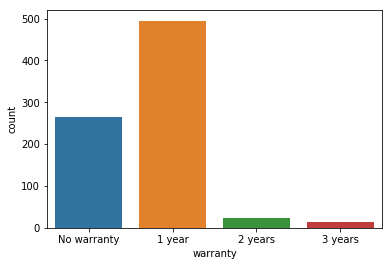

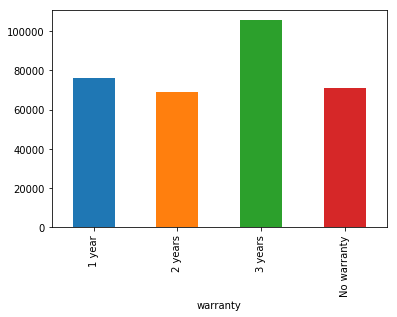

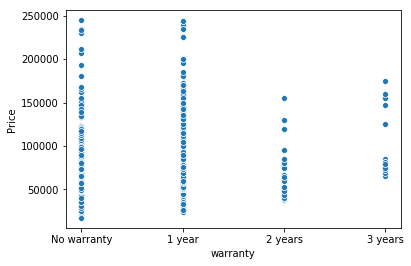

Anova test
              df        sum_sq       mean_sq         F   PR(>F)
warranty    3.0  1.762809e+10  5.876031e+09  3.811552  0.00993
Residual  791.0  1.219435e+12  1.541638e+09       NaN      NaN


In [118]:
print("Data Type\n",data.warranty.dtype)
print("Unique Datas\n",data.warranty.unique())
print("Describing the data\n",data.warranty.describe())
print("Count of each unique datas\n",data.warranty.value_counts())

sns.countplot(data.warranty)
plt.show()
data.groupby("warranty")["Price"].mean().plot(kind="bar")
plt.show()
sns.scatterplot(x="warranty",y="Price",data=data)
plt.show()

model_warranty=ols("Price ~ warranty",data=data).fit()
anova_warranty=sm.stats.anova_lm(model_warranty)
print("Anova test\n",anova_warranty)

In [119]:
data.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'graphic_card_gb', 'weight',
       'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

Data Type
 object
Unique Datas
 ['No' 'Yes']
Describing the data
 count     795
unique      2
top        No
freq      700
Name: Touchscreen, dtype: object
Count of each unique datas
 No     700
Yes     95
Name: Touchscreen, dtype: int64


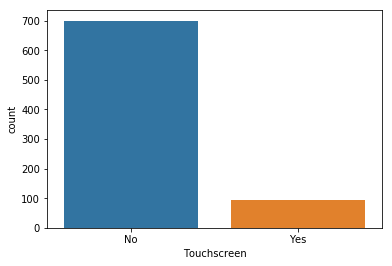

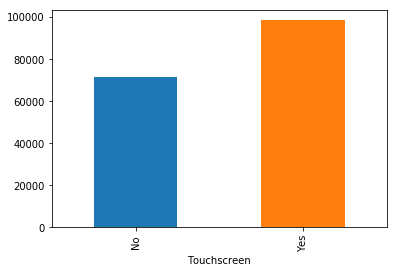

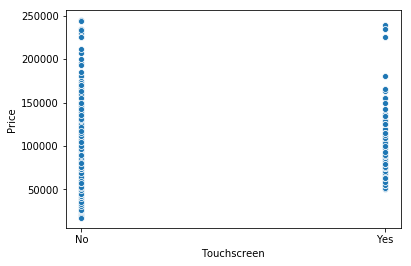

Anova test
                 df        sum_sq       mean_sq          F        PR(>F)
Touchscreen    1.0  6.057629e+10  6.057629e+10  40.830873  2.828684e-10
Residual     793.0  1.176487e+12  1.483590e+09        NaN           NaN


In [120]:
print("Data Type\n",data.Touchscreen.dtype)
print("Unique Datas\n",data.Touchscreen.unique())
print("Describing the data\n",data.Touchscreen.describe())
print("Count of each unique datas\n",data.Touchscreen.value_counts())

sns.countplot(data.Touchscreen)
plt.show()
data.groupby("Touchscreen")["Price"].mean().plot(kind="bar")
plt.show()
sns.scatterplot(x="Touchscreen",y="Price",data=data)
plt.show()

model_Touchscreen=ols("Price ~ Touchscreen",data=data).fit()
anova_Touchscreen=sm.stats.anova_lm(model_Touchscreen)
print("Anova test\n",anova_Touchscreen)

In [121]:
data.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'graphic_card_gb', 'weight',
       'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

Data Type
 object
Unique Datas
 ['No' 'Yes']
Describing the data
 count     795
unique      2
top        No
freq      515
Name: msoffice, dtype: object
Count of each unique datas
 No     515
Yes    280
Name: msoffice, dtype: int64


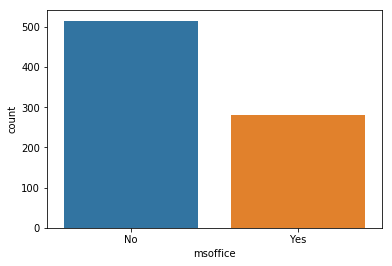

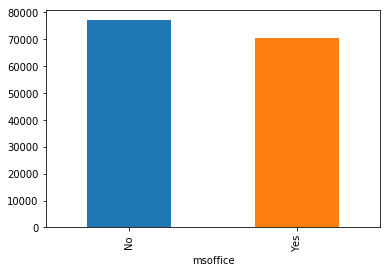

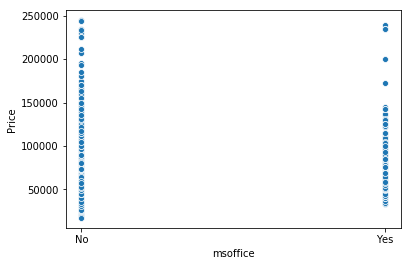

Anova test
              df        sum_sq       mean_sq         F    PR(>F)
msoffice    1.0  8.233632e+09  8.233632e+09  5.313405  0.021419
Residual  793.0  1.228830e+12  1.549596e+09       NaN       NaN


In [122]:
print("Data Type\n",data.msoffice.dtype)
print("Unique Datas\n",data.msoffice.unique())
print("Describing the data\n",data.msoffice.describe())
print("Count of each unique datas\n",data.msoffice.value_counts())

sns.countplot(data.msoffice)
plt.show()
data.groupby("msoffice")["Price"].mean().plot(kind="bar")
plt.show()
sns.scatterplot(x="msoffice",y="Price",data=data)
plt.show()

model_msoffice=ols("Price ~ msoffice",data=data).fit()
anova_msoffice=sm.stats.anova_lm(model_msoffice)
print("Anova test\n",anova_msoffice)

In [123]:
data.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'graphic_card_gb', 'weight',
       'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

Data Type
 object
Unique Datas
 ['2 stars' '3 stars' '4 stars' '5 stars' '1 star']
Describing the data
 count         795
unique          5
top       4 stars
freq          435
Name: rating, dtype: object
Count of each unique datas
 4 stars    435
3 stars    335
5 stars     14
2 stars      9
1 star       2
Name: rating, dtype: int64


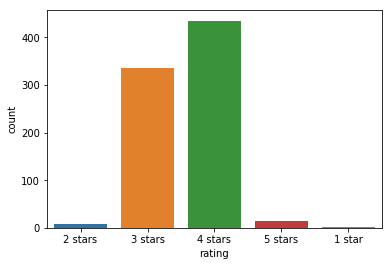

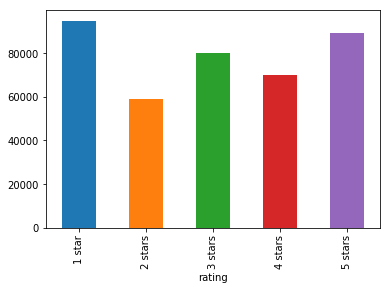

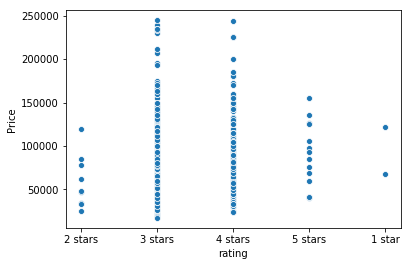

Anova test
              df        sum_sq       mean_sq         F    PR(>F)
rating      4.0  2.574660e+10  6.436649e+09  4.197872  0.002274
Residual  790.0  1.211317e+12  1.533312e+09       NaN       NaN


In [124]:
print("Data Type\n",data.rating.dtype)
print("Unique Datas\n",data.rating.unique())
print("Describing the data\n",data.rating.describe())
print("Count of each unique datas\n",data.rating.value_counts())

sns.countplot(data.rating)
plt.show()
data.groupby("rating")["Price"].mean().plot(kind="bar")
plt.show()
sns.scatterplot(x="rating",y="Price",data=data)
plt.show()

model_rating=ols("Price ~ rating",data=data).fit()
anova_rating=sm.stats.anova_lm(model_rating)
print("Anova test\n",anova_rating)

In [125]:
data.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'graphic_card_gb', 'weight',
       'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

Data Type
 int64
Unique Datas
 [    3    65     8     0    31  1946   259   425  1120   286    58     7
 15279   311    47    37  2080  1479    67   273  1267    14   284    44
    33    10   816   543     9  1178   299    20   758   634     4    17
    24  1753   216  1084    19   106    42  1029    53    48    61    97
   181   529  5205  1090     1    70   632    71   990   158   681   130
    30     6   174    40    13   184  1296   571  2551    35   118   245
  2058   117    74    39    29    43   984   523  1605  4008  1869  1278
   143    28  2124   276   250  1917  4999  4203    15   527   103   324
    69    16    12  1146  1850   231   502  1096   313   265    38   818
    25   974    83   637   207   844    62   724    56   170    95   197
  1180   232   596    84   414 10966  1881    23  4428   129   365   116
   206   300   108  3712   825    85   155    91   126    75   124  1597
  3850     5   213    93    11   262    45  1681  1625   282   677    46
    26  1541    72  

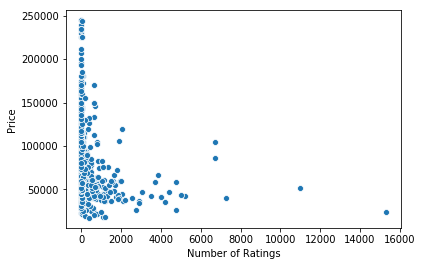

correlation
 [[ 1.        -0.1602164]
 [-0.1602164  1.       ]]


In [126]:
print("Data Type\n",data["Number of Ratings"].dtype)
print("Unique Datas\n",data["Number of Ratings"].unique())
print("Describing the data\n",data["Number of Ratings"].describe())

sns.scatterplot(x="Number of Ratings",y="Price",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["Number of Ratings"],data.Price))

In [127]:
data.drop("Number of Ratings",axis=1,inplace=True)

In [128]:
data.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'graphic_card_gb', 'weight',
       'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Reviews'],
      dtype='object')

Data Type
 int64
Unique Datas
 [   0    5    1    3  240   47   67  196   19    6 1947   27    7  235
  181   30  171   39    4   36  147   65  137   41   64    2  165   21
  160   13  107   11  561   96    9   92    8  108   18   59   12   29
  126   56  297   17   34  305   99   66  215  519  234  135   15  233
   40  189  490   46   10   45  175  216   26   93  116   35  113  170
   91   16  103   25  148   23   54 1185  241  109  569   24  412   95
   20  228  378   31  227  152   87  123   14  112   71  100   37   85
   48  118   28  179  106  325  127   51  128   53  230   49   83  313
  629   70   89  658  350  375   33   42  895   58  432   84  532   80
  188  134   52  203   69  151   74  145   22]
Describing the data
 count     795.000000
mean       36.400000
std       118.787444
min         0.000000
25%         0.000000
50%         2.000000
75%        18.500000
max      1947.000000
Name: Number of Reviews, dtype: float64


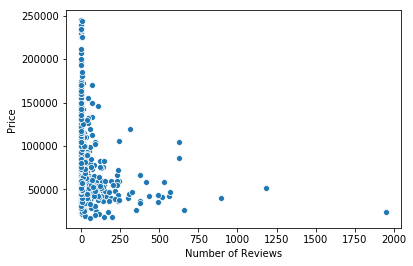

correlation
 [[ 1.         -0.16505625]
 [-0.16505625  1.        ]]


In [129]:
print("Data Type\n",data["Number of Reviews"].dtype)
print("Unique Datas\n",data["Number of Reviews"].unique())
print("Describing the data\n",data["Number of Reviews"].describe())

sns.scatterplot(x="Number of Reviews",y="Price",data=data)
plt.show()

print("correlation\n",np.corrcoef(data["Number of Reviews"],data.Price))

In [130]:
data.drop("Number of Reviews",axis=1,inplace=True)

In [131]:
data.reset_index(drop=True,inplace=True)

In [132]:
X=data.drop("Price",axis=1)
X.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,0 GB,Casual,No warranty,No,No,2 stars
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,0 GB,Casual,No warranty,No,No,3 stars
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,0 GB,Casual,No warranty,No,No,3 stars
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,2 GB,Casual,No warranty,No,No,3 stars
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,0 GB,Casual,No warranty,No,No,3 stars


In [133]:
X=pd.get_dummies(X,drop_first=True)
X

,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,brand_acer,processor_brand_Intel,processor_brand_M1,processor_name_Core i3,...,weight_ThinNlight,warranty_2 years,warranty_3 years,warranty_No warranty,Touchscreen_Yes,msoffice_Yes,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
0,1,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
6,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
7,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
8,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [134]:
y=data.price
y.head()

0    10.453024
1    10.571291
2    10.596610
3    11.156108
4    10.203222
Name: Price, dtype: float64

In [164]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=14)

In [165]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((636, 59), (159, 59), (636,), (159,))

In [137]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_train_pre=lr.predict(X_train)
y_test_pre=lr.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.16029608741233717
Test RMSE = 0.19763157964083206
Train R2_square = 0.88454582630192
Test R2_square = 0.8322011075831238


In [138]:
DR=DecisionTreeRegressor()
DR.fit(X_train,y_train)
y_train_pre=DR.predict(X_train)
y_test_pre=DR.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.041699755463512976
Test RMSE = 0.28396958472805445
Train R2_square = 0.992186766387152
Test R2_square = 0.653566358623123


In [139]:
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
y_train_pre=RF.predict(X_train)
y_test_pre=RF.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.08243233999906945
Test RMSE = 0.22347866461804092
Train R2_square = 0.969467733111797
Test R2_square = 0.7854401083244242


In [140]:
n_estimators=[i for i in range(50,500,50)]
max_depth=[i for i in range(5,30,5)]
min_samples_leaf=[i for i in range(2,20,2)]

In [141]:
random_grid_RF={"n_estimators":n_estimators,"max_depth":max_depth,"min_samples_leaf":min_samples_leaf}

In [142]:
from sklearn.model_selection import RandomizedSearchCV
RF_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid_RF,cv=4,random_state = 0)

In [143]:
RF_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450], 'max_depth': [5, 10, 15, 20, 25], 'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [144]:
RF_model.best_params_

{'n_estimators': 200, 'min_samples_leaf': 6, 'max_depth': 10}

In [145]:
RF=RandomForestRegressor(n_estimators=200, min_samples_leaf=6,max_depth=10)
RF.fit(X_train,y_train)
y_train_pre=RF.predict(X_train)
y_test_pre=RF.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.16882762388660819
Test RMSE = 0.23365778344133956
Train R2_square = 0.8719289973060069
Test R2_square = 0.7654492040494105


In [169]:
ls=Lasso()
ls.fit(X_train,y_train)
y_train_pre=ls.predict(X_train)
y_test_pre=ls.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.4717567287580528
Test RMSE = 0.48259780413899855
Train R2_square = 0.0
Test R2_square = -0.000569105445062057


In [170]:
Rg=Ridge()
Rg.fit(X_train,y_train)
y_train_pre=Rg.predict(X_train)
y_test_pre=Rg.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.16481017783979093
Test RMSE = 0.2052477245399745
Train R2_square = 0.8779516677209314
Test R2_square = 0.8190189480752476


Linear Regression model gives a good accuracy for both train and test data